In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Dataset/Cap 15 - dados_1997_2011_paises_csv.csv', sep=';', decimal=',', encoding='latin1')

df.head(10)

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215
5,África do Sul,2002,0.6092,50,40.97,62.15008,111100828.0,46076.953
6,África do Sul,2003,0.6058,48,47.67,61.81803,168219302.0,46566.626
7,África do Sul,2004,0.6024,48,53.79,63.23793,219092937.0,47032.866
8,África do Sul,2005,0.5990,44,51.95,64.01835,247064310.0,47483.447
9,África do Sul,2006,0.6010,46,52.01,64.97832,261007039.0,47925.669


# Exemplo estatísticas descritivas

In [3]:
df.groupby('pais').agg(min_idh = pd.NamedAgg('idh', 'min'),
                 max_idh = pd.NamedAgg('idh', 'max'),
                 media_idh = pd.NamedAgg('idh', 'mean'),
                 mediana_idh = pd.NamedAgg('idh', 'median'))

,min_idh,max_idh,media_idh,mediana_idh
pais,,,,
Alemanha,0.8466,0.9050,0.882880,0.8888
Austrália,0.8958,0.9290,0.914507,0.9156
Brasil,0.6464,0.7180,0.684653,0.6866
Bélgica,0.8628,0.8860,0.876107,0.8754
Canadá,0.8736,0.9080,0.890480,0.8894
China,0.5598,0.6870,0.625240,0.6240
Cingapura,0.7404,0.8660,0.821587,0.8282
Coréia,0.8078,0.8970,0.856907,0.8588
Espanha,0.8162,0.8780,0.852427,0.8534


# Exemplos de probabilidade

In [10]:
!pip install scipy

from scipy.stats import binom, poisson, norm

Defaulting to user installation because normal site-packages is not writeable


## Distribuição Binomial
A distribuição binomial é usada para modelar o número de sucessos em uma série de experimentos independentes, onde cada experimento tem apenas dois resultados possíveis: sucesso ou falha (como "sim ou não", "acerto ou erro").

### Características principais:
- Número fixo de tentativas (𝑛): A quantidade total de experimentos é definida.
- Resultados binários: Cada tentativa resulta em sucesso ou falha.
Probabilidade constante (𝑝): A chance de sucesso é a mesma em cada tentativa.
- Independência: O resultado de uma tentativa não afeta as demais.

### Exemplos de aplicação:
- Quantidade de caras em 10 lançamentos de uma moeda.
- Número de respostas corretas em uma prova de múltipla escolha.
- Quantidade de peças aprovadas em uma inspeção de qualidade.

### Intuição:
Se você lançar uma moeda 10 vezes (𝑛=10) e a probabilidade de cair "cara" (𝑝) for 50%, a distribuição binomial pode modelar a probabilidade de obter exatamente 5 caras, 6 caras, ou qualquer outro número em 10 lançamentos.

### Propriedades:
- A média da distribuição é 𝑛 ⋅ 𝑝 (número de tentativas vezes a probabilidade de sucesso).
- A variância é 𝑛 ⋅ 𝑝(1−𝑝) (considerando o sucesso e o fracasso).

É útil para situações onde o resultado de cada tentativa é binário e você deseja calcular probabilidades para diferentes números de sucessos.


In [ ]:
# binominal
n = 5
p = 0.8

binom.pmf(k=1, n=n, p=p)

0.006399999999999999

## Distribuição de Poisson

A distribuição de Poisson é uma forma de modelar a probabilidade de um número específico de eventos ocorrer em um intervalo fixo de tempo ou espaço, quando:

1 - Os eventos são independentes: A ocorrência de um evento não influencia os outros.
2 - A taxa de ocorrência é constante: O número médio de eventos em cada intervalo é sempre o mesmo.
3 - Os eventos não acontecem simultaneamente: Apenas um evento ocorre por vez em um intervalo.

### Exemplos de uso:

- Quantidade de clientes chegando em uma loja por hora.
- Número de chamadas recebidas por uma central de atendimento em 10 minutos.
- Total de defeitos encontrados em uma linha de produção.


### Características principais:
- Focado em eventos que acontecem de forma aleatória, mas previsível em média.
- A taxa média de ocorrência é o parâmetro principal usado para descrever a distribuição.

É muito usada para modelar eventos raros ou em situações em que os dados são contados em intervalos definidos.


In [12]:
mu = 2 
poisson.pmf(k=1, mu=mu)

0.2706705664732254

## Distribuição Normal

A distribuição normal é uma das distribuições de probabilidade mais importantes na estatística, usada para modelar variáveis contínuas. Também conhecida como distribuição Gaussiana, ela tem uma forma de sino (simétrica) e é definida por dois parâmetros principais:

Média (𝜇): Indica o centro da distribuição.
Desvio padrão (σ): Mede a dispersão ou o quão espalhados estão os valores em relação à média.

### Características principais:
- Simetria: A distribuição é simétrica em torno da média (𝜇).
- Forma de sino: A maioria dos valores está próxima da média, com poucos valores extremos nas "caudas".

### Regra Empírica (68-95-99.7):
- 68% dos dados estão dentro de 1 desvio padrão da média  (𝜇±𝜎).
- 95% dentro de 2 desvios padrão (𝜇±2𝜎).
- 99,7% dentro de 3 desvios padrão (𝜇±3𝜎).

### Aplicações:
- Altura, peso ou outras características físicas de populações.
- Erros de medição em experimentos.
- Retornos financeiros em mercados estabilizados.

### Exemplo intuitivo:
Se a altura média de uma população é 1,70 m, com desvio padrão de 0,1 m, a maioria das pessoas terá altura entre 1,60 m e 1,80 m (1 desvio padrão da média), com poucas pessoas muito mais altas ou muito mais baixas.


In [13]:
media = 30 
desvio_padrao = 3
norm.pdf(x=25, loc=media, scale=desvio_padrao)

0.03315904626424956

# Amostragem

A amostragem é o processo de selecionar um grupo menor (amostra) de uma população maior para analisar e tirar conclusões sobre toda a população. É usada quando não é viável ou necessário coletar dados de todos os indivíduos.

### Por que usar?
- Economiza tempo e recursos.
- Permite estudar grandes populações de forma eficiente.
- Ajuda a tomar decisões com base em uma parte representativa.

### Tipos principais:
- Aleatória: Cada indivíduo da população tem a mesma chance de ser escolhido.
- Estratificada: Divide a população em grupos (estratos) e seleciona amostras de cada grupo.
- Sistemática: Escolhe indivíduos a partir de um intervalo fixo (ex.: a cada 10 pessoas).
- Por conveniência: Usa indivíduos de fácil acesso (menos confiável).

### Exemplo:
Se você quer saber a opinião dos alunos de uma escola sobre um tema, pode entrevistar 50 de 500 alunos. A escolha desses 50 alunos será feita por algum método de amostragem.

O objetivo é garantir que a amostra seja representativa para tirar conclusões confiáveis sobre toda a escola.

In [14]:
df.shape

(285, 8)

In [16]:
df_amostra = df.sample(n=100)
df_amostra.shape

(100, 8)

In [17]:
df_amostra.head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao
189,Holanda,2006,0.8970,87,75.93,90.78539,3.891464e+05,16304.77618
146,Espanha,2008,0.8710,68,57.51,84.70928,1.593912e+09,45910.36500
114,Cingapura,2006,0.8430,93,90.99,83.19348,1.387299e+08,4713.56100
20,Alemanha,2002,0.8764,76,67.21,85.26765,2.006588e+09,82722.89350
248,México,2005,0.7410,36,41.48,60.78365,7.980454e+05,106202.90300


# Teste de Hipótese

O teste de hipótese é uma técnica estatística para avaliar uma suposição sobre uma população, com base em dados amostrais. Ele compara duas hipóteses:

- Hipótese Nula (𝐻0) Não há efeito ou diferença.
- Hipótese Alternativa (𝐻𝑎H): Há um efeito ou diferença.

### Processo:
- Definir 𝐻0 e Ha.
- Escolher o nível de significância (𝛼, geralmente 5%).
- Calcular a estatística de teste e o valor-𝑝.
- Decisão:
    - Rejeitar 𝐻0: Se 𝑝<𝛼, há evidências para 𝐻a.
    - Não rejeitar 𝐻0: Se 𝑝≥𝛼, não há evidências suficientes para 𝐻𝑎.

### Exemplos:
- Testar se uma nova média é diferente de um valor específico.
- Verificar se dois grupos têm a mesma média.
​
É usado para tomar decisões baseadas em dados, garantindo rigor estatístico.

In [18]:
from scipy import stats as st

In [19]:
df_brasil = df[df['pais'] == 'Brasil']

In [20]:
st.ttest_1samp(df_brasil['idh'], popmean=0.5)

TtestResult(statistic=31.467547309127106, pvalue=2.1573861411421064e-14, df=14)

# Correlação
A correlação mede a relação entre duas variáveis, indicando se e como elas estão associadas.

###  Coeficiente (𝑟):
- 𝑟 = 1: Correlação positiva perfeita.
- r = −1: Correlação negativa perfeita.
- r = 0: Sem relação linear.
### Tipos:

- Positiva: Ambas aumentam/diminuem juntas.
- Negativa: Uma aumenta enquanto a outra diminui.
- Ausente: Sem relação linear.
### Métodos comuns:
- Pearson (linear), Spearman (não linear), Kendall (dados ordenados).

**Importante:** Correlação não implica causalidade.

In [22]:
cols = ['idh', 'corrupcao_indice', 'globalizacao_indice', 'competitividade_indice']
df[cols].corr()

,idh,corrupcao_indice,globalizacao_indice,competitividade_indice
idh,1.000000,0.742528,0.807371,0.576736
corrupcao_indice,0.742528,1.000000,0.807345,0.753907
globalizacao_indice,0.807371,0.807345,1.000000,0.580710
competitividade_indice,0.576736,0.753907,0.580710,1.000000


# Exemplo de Regressão Linear

**Cenário:** Prever o faturamento de uma loja com base no número de anúncios.

### Dados:
- Anúncios: [1, 2, 3, 4, 5].
- Faturamento: [1000, 2000, 3000, 4000, 5000].

### Modelo ajustado: 
𝑦 = 1000𝑥 (faturamento aumenta 1000 por anúncio).

### Previsão:

Para 6 anúncios: 𝑦 = 1000 × 6 = 6000.

Uso: Prever resultados futuros e entender relações entre variáveis.


In [23]:
import statsmodels.formula.api as sm

In [25]:
modelo_ols = sm.ols(formula = 'idh ~ corrupcao_indice + globalizacao_indice + competitividade_indice', data=df).fit()

In [26]:
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    idh   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     197.3
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           7.53e-69
Time:                        22:03:13   Log-Likelihood:                 365.76
No. Observations:                 285   AIC:                            -723.5
Df Residuals:                     281   BIC:                            -708.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3039      0.029     10.493      0.000       0.247       0.361
corrupcao_indice           0.0010      0.000      2.756      0.006       0.000       0.002
globalizacao_indice        0.0053      0.001     10.492      0.000       0.004       0.006
competitividade_indice     0.0006      0.000      1.516      0.131      -0.000       0.001
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.414
Skew:                           0.092   Prob(JB):                        0.813
Kurtosis:                       2.963   Cond. No.                         870.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# K-Means
O K-Means é um algoritmo de aprendizado não supervisionado usado para agrupamento de dados em 𝑘 grupos com base em similaridades.

### Como funciona:
- Inicializa k centróides (pontos centrais dos grupos).
- Atribui os dados ao centróide mais próximo.
- Recalcula os centróides com base na média dos pontos do grupo.
- Repete os passos até que os centróides não mudem significativamente.

### Aplicações:
- Segmentação de clientes.
- Agrupamento de imagens.
- Identificação de padrões em dados.

### Limitações:

- Depende do número 𝑘 definido pelo usuário.
- Sensível a outliers e escala dos dados.

In [27]:
from sklearn.cluster import KMeans

In [28]:
# Estatisca descritiva

df_resumo = df.groupby('pais').agg(
    media_corrupcao = pd.NamedAgg('corrupcao_indice', 'mean'),
    media_globalizacao = pd.NamedAgg('globalizacao_indice', 'mean'),
    media_competitividade = pd.NamedAgg('competitividade_indice', 'mean')
).reset_index()

In [29]:
KMeans = KMeans(init="random",
    n_clusters=3,
    n_init= 10,
    max_iter=300,
    random_state=42)
    

In [31]:
KMeans.fit(df_resumo[['media_corrupcao', 'media_globalizacao', 'media_competitividade']])

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [32]:
df_resumo['cluster'] = KMeans.labels_

In [33]:
df_resumo.head()

,pais,media_corrupcao,media_globalizacao,media_competitividade,cluster
0,Alemanha,79.066667,84.034138,74.262667,0
1,Austrália,86.800000,81.790126,80.448667,0
2,Brasil,36.533333,59.332414,49.568000,2
3,Bélgica,67.200000,92.173351,69.065333,1
4,Canadá,88.466667,87.087049,81.897333,0


In [34]:
df_resumo = df.groupby('pais').agg(
    media_pib = pd.NamedAgg('pib', 'mean')).reset_index()

<Axes: >

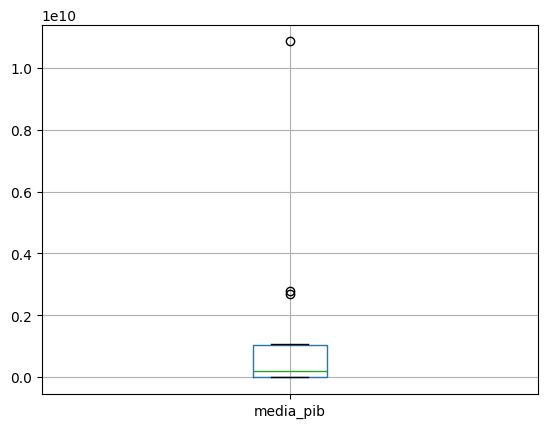

In [36]:
df_resumo[['media_pib']].boxplot()